# COVID-19 plots
The purpose of this notebook is to plot the progression of COVID-19 cases based upon the New York Times' daily updated database. See https://github.com/nytimes/covid-19-data for more details on that database. Note data are stored by state and by county. Plots are linear-log, in order to capture the exponential growth of COVID-19, and perhaps more easily visualize when this growth is no longer exponential. 

Kirk Knobelspiesse, knobelspiesse@gmail.com

## Setup

In [1]:
import numpy as np
import pandas as pd
print('Using pandas version ',pd.__version__)
%matplotlib inline

# Only 10 rows of data will be displayed
pd.set_option("max_rows", 10) 

# Print floating point numbers using fixed point notation
np.set_printoptions(suppress=True)

# Set figure size
LARGE_FIGSIZE = (8, 6)
#from seaborn import set_style
#set_style("darkgrid")
import seaborn as sns
sns.set(style='ticks', context='talk')
import matplotlib.pyplot as plt
from datetime import datetime

Using pandas version  0.25.3


## Get data

In [2]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/"
filename_states = "us-states.csv"
filename_counties="us-counties.csv"
stt = pd.read_csv(url+filename_states, skiprows=2, names=["date","state","fips","cases","deaths"])
cyt = pd.read_csv(url+filename_counties, skiprows=2, names=["date","county","state","fips","cases","deaths"])


In [3]:
cyt

,date,county,state,fips,cases,deaths
0,2020-01-22,Snohomish,Washington,53061.0,1,0
1,2020-01-23,Snohomish,Washington,53061.0,1,0
2,2020-01-24,Cook,Illinois,17031.0,1,0
3,2020-01-24,Snohomish,Washington,53061.0,1,0
4,2020-01-25,Orange,California,6059.0,1,0
...,...,...,...,...,...,...
64701,2020-04-16,Sublette,Wyoming,56035.0,1,0
64702,2020-04-16,Sweetwater,Wyoming,56037.0,10,0
64703,2020-04-16,Teton,Wyoming,56039.0,59,0
64704,2020-04-16,Uinta,Wyoming,56041.0,4,0


/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


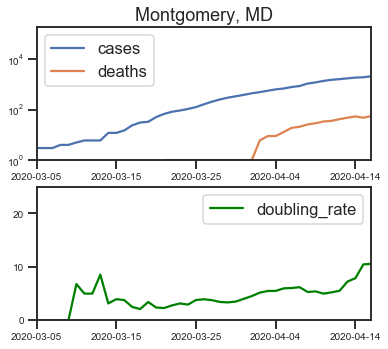

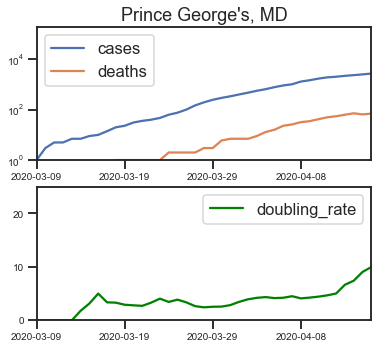

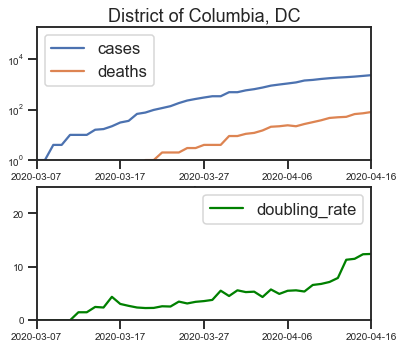

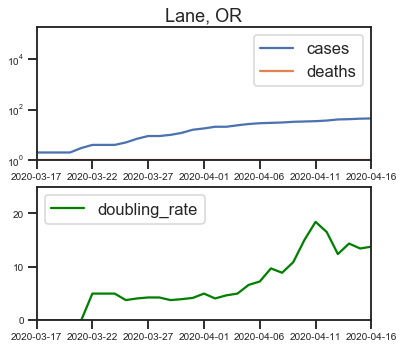

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


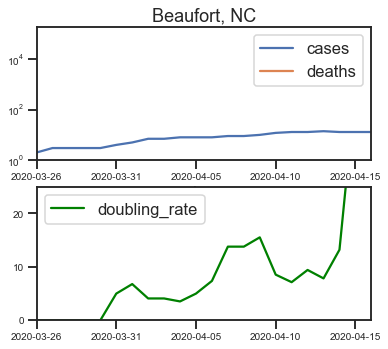

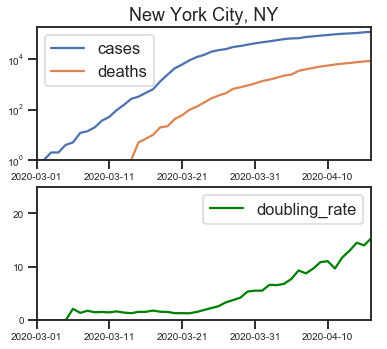

In [31]:

this_state=["Maryland","Maryland","District of Columbia",\
            "Oregon", "North Carolina","New York"]
this_state_short=["MD","MD","DC","OR","NC","NY"]

this_county=["Montgomery","Prince George's","District of Columbia",\
            "Lane","Beaufort","New York City"]

yr=[1,200000]
fs=10
days_passed=5

for i in range(0,len(this_state)):
    this=cyt[(cyt.state==this_state[i]) & (cyt.county==this_county[i])]
    tt=this.cases.to_numpy(copy=True)
    r_tt=np.roll(tt,days_passed)
    doubling_rate= (days_passed*np.log(2.))/(np.log(tt/r_tt))
    doubling_rate[np.argwhere(doubling_rate<0)]=0
    this['doubling_rate']=doubling_rate
    
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6,6))
    this_name=this_county[i]+", "+this_state_short[i]
    this.plot('date',['cases','deaths'],kind = 'line',title=this_name,
              fontsize=fs,logy=True,ylim=yr,ax=axes[0])
    this.plot('date','doubling_rate',kind = 'line',color='green',
          fontsize=fs,logy=False,ylim=[0,25],ax=axes[1])
    this_savename="CV19_county_"+this_county[i].replace(" ", "")+".pdf"
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel("")
    plt.savefig(this_savename)
    plt.show()
    plt.close()
    
    

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


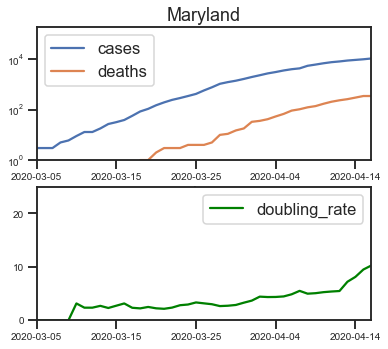

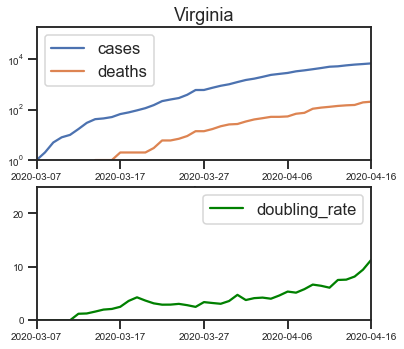

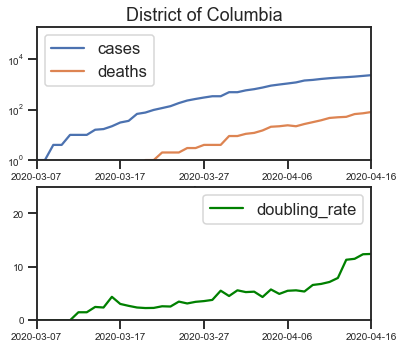

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


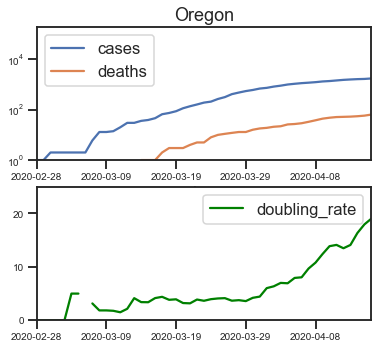

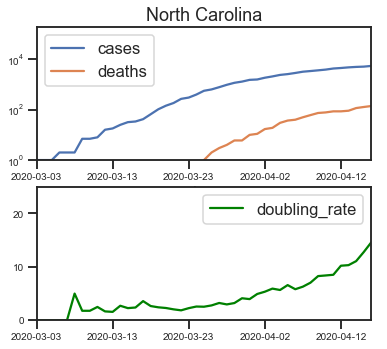

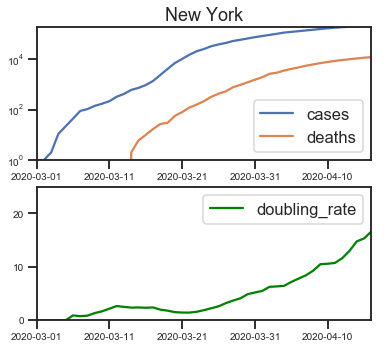

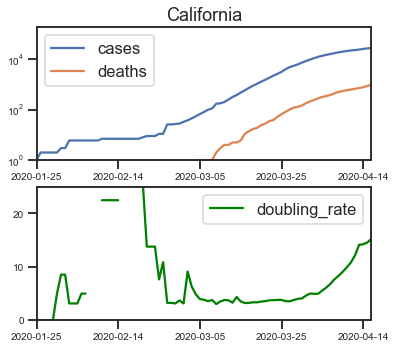

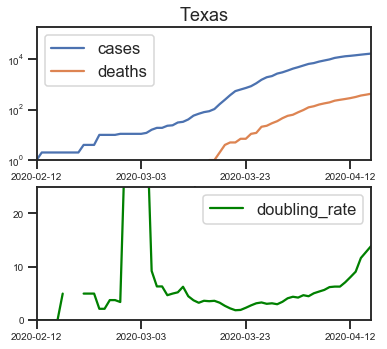

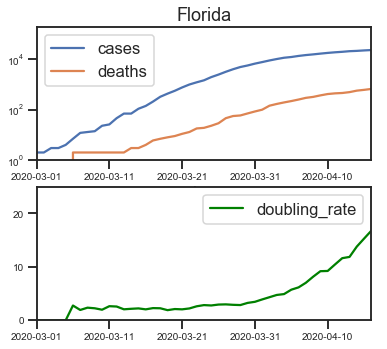

In [32]:

this_state=["Maryland","Virginia","District of Columbia",\
            "Oregon", "North Carolina","New York","California","Texas","Florida"]


#fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(16,10))
yr=[1,200000]
fs=10
days_passed=5

for i in range(0,len(this_state)):
    this=stt[stt.state==this_state[i]]
    tt=this.cases.to_numpy(copy=True)
    r_tt=np.roll(tt,days_passed)
    doubling_rate= (days_passed*np.log(2.))/(np.log(tt/r_tt))
    doubling_rate[np.argwhere(doubling_rate<0)]=0
    this['doubling_rate']=doubling_rate
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6,6))
    this.plot('date',['cases','deaths'],kind = 'line',title=this_state[i],
              fontsize=fs,logy=True,ylim=yr,ax=axes[0])
    this.plot('date','doubling_rate',kind = 'line',color='green',
          fontsize=fs,logy=False,ylim=[0,25],ax=axes[1])
    this_savename="CV19_state_"+this_state[i].replace(" ", "")+".pdf"
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel("")
    plt.savefig(this_savename)
    plt.show()
    plt.close()
    
    

/Users/kknobels/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


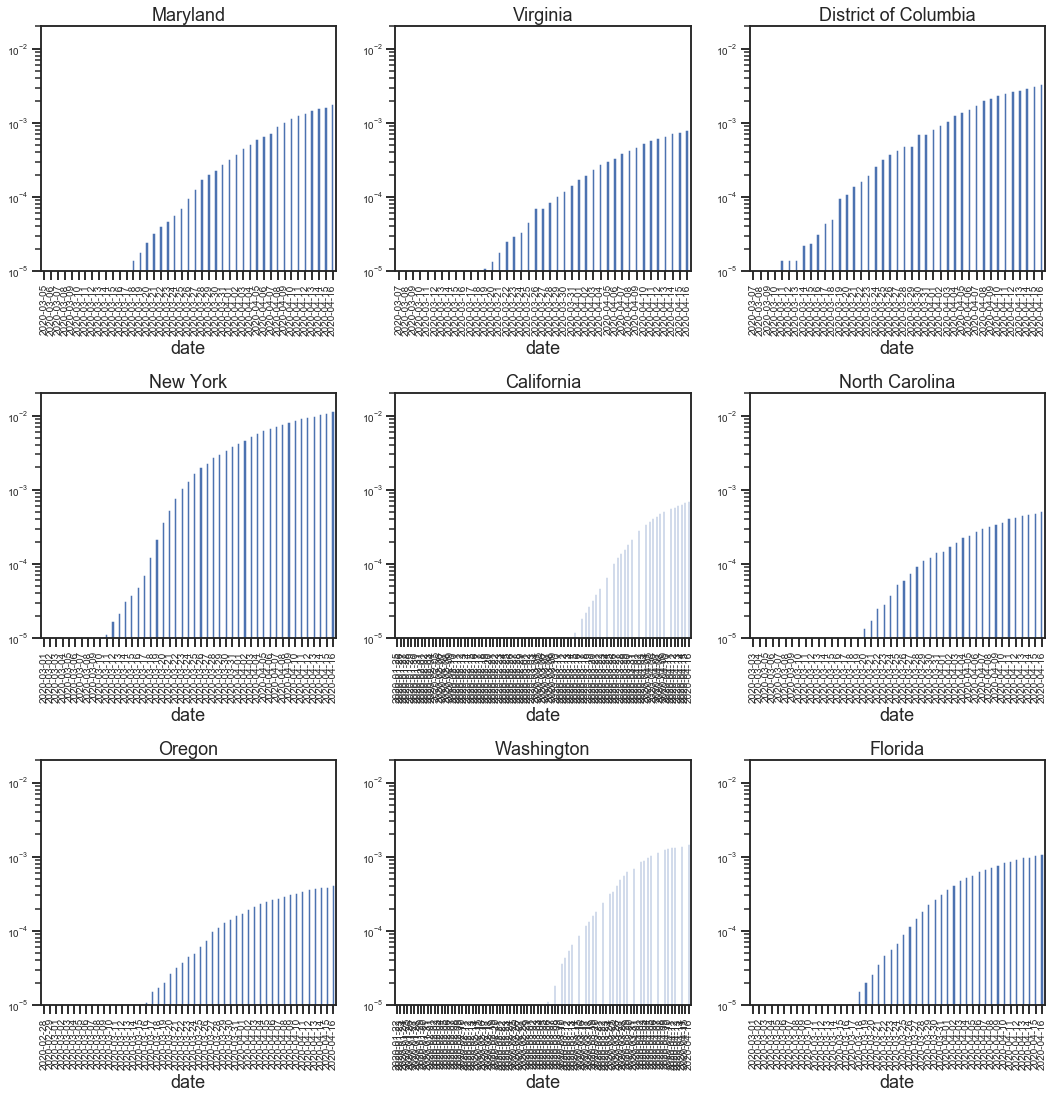

In [35]:

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(18,18))
yr=[.00001,0.02]
fs=10

nme="Maryland"
this=stt[stt.state==nme]
this.cases=this.cases/6045680.
this.cases.plot(ylim=yr, fontsize=fs, ax=axes[0,0],kind='bar',logy=True,title=nme);

nme="Virginia"
this=stt[stt.state==nme]
this.cases=this.cases/8535519.
this.cases.plot(ylim=yr, fontsize=fs, ax=axes[0,1],kind='bar',logy=True,title=nme);

nme="District of Columbia"
this=stt[stt.state==nme]
this.cases=this.cases/705749.
this.cases.plot(ylim=yr, fontsize=fs, ax=axes[0,2],kind='bar',logy=True,title=nme);

nme="New York"
this=stt[stt.state==nme]
this.cases=this.cases/19453561.
this.cases.plot(ylim=yr, fontsize=fs, ax=axes[1,0],kind='bar',logy=True,title=nme);

nme="California"
this=stt[stt.state==nme]
this.cases=this.cases/39512223.
this.cases.plot(ylim=yr, fontsize=fs, ax=axes[1,1],kind='bar',logy=True,title=nme);

nme="North Carolina"
this=stt[stt.state==nme]
this.cases=this.cases/10488084.
this.cases.plot(ylim=yr, fontsize=fs, ax=axes[1,2],kind='bar',logy=True,title=nme);

nme="Oregon"
this=stt[stt.state==nme]
this.cases=this.cases/4217737.
this.cases.plot(ylim=yr, fontsize=fs, ax=axes[2,0],kind='bar',logy=True,title=nme);

nme="Washington"
this=stt[stt.state==nme]
this.cases=this.cases/7614893.
this.cases.plot(ylim=yr, fontsize=fs, ax=axes[2,1],kind='bar',logy=True,title=nme);

nme="Florida"
this=stt[stt.state==nme]
this.cases=this.cases/21477737.
this.cases.plot(ylim=yr, fontsize=fs, ax=axes[2,2],kind='bar',logy=True,title=nme);


plt.subplots_adjust(hspace=0.5)
plt.savefig('CV19_state.pdf')


In [7]:
mont=cyt[ (cyt.state=="Maryland") & (cyt.county=="Montgomery")]

mont

In [8]:
mont

,county,state,fips,cases,deaths
date,,,,,
2020-03-05,Montgomery,Maryland,24031.0,3,0
2020-03-06,Montgomery,Maryland,24031.0,3,0
2020-03-07,Montgomery,Maryland,24031.0,3,0
2020-03-08,Montgomery,Maryland,24031.0,4,0
2020-03-09,Montgomery,Maryland,24031.0,4,0
...,...,...,...,...,...
2020-04-12,Montgomery,Maryland,24031.0,1631,42
2020-04-13,Montgomery,Maryland,24031.0,1756,48
2020-04-14,Montgomery,Maryland,24031.0,1883,54


In [107]:
st=pd.to_datetime('2020-03-15')
ed=pd.Timestamp(datetime.now())
print(st)
print(ed)

mont[pd.Timestamp(mont.index) > st]

#mont[mont.index.timestamp() >= st]

2020-03-15 00:00:00
2020-04-06 18:03:14.968277


TypeError: Cannot convert input [Index(['2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
       '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-04-05'],
      dtype='object', name='date')] of type <class 'pandas.core.indexes.base.Index'> to Timestamp